## 8.1. Getting started:
 
Run the following code. Read the inline comments and check the documentation. The patterns and the flipped pixels are randomly chosen. Therefore the result changes every time you execute this code. Run it several times and change some parameters like nr_patterns and nr_of_flips.

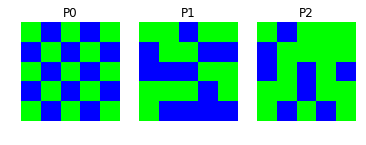

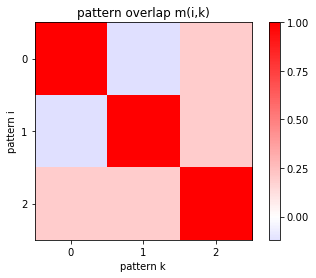

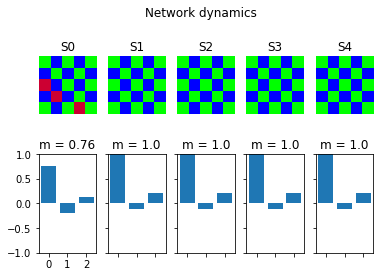

In [69]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import matplotlib.pyplot as plt
import numpy as np

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=2, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.2. Introduction: Hopfield-networks
This exercise uses a model in which neurons are pixels and take the values of -1 (off) or +1 (on). The network can store a certain number of pixel patterns, which is to be investigated in this exercise. During a retrieval phase, the network is started with some initial configuration and the network dynamics evolves towards the stored pattern (attractor) which is closest to the initial configuration.



where N is the number of neurons, pμi is the value of neuron i in pattern number μ and the sum runs over all patterns from μ=1 to μ=P. This is a simple correlation based learning rule (Hebbian learning). Since it is not a iterative rule it is sometimes called one-shot learning. The learning rule works best if the patterns that are to be stored are random patterns with equal probability for on (+1) and off (-1). In a large networks (N to infinity) the number of random patterns that can be stored is approximately 0.14 times N.

## 8.3. Exercise: N=4x4 Hopfield-network
We study how a network stores and retrieve patterns. Using a small network of only 16 neurons allows us to have a close look at the network weights and dynamics.

### 8.3.1. Question: Storing a single pattern
Modify the Python code given above to implement this exercise:

Create a network with N=16 neurons.
Create a single 4 by 4 checkerboard pattern.
Store the checkerboard in the network.
Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
Let the network dynamics evolve for 4 iterations.
Plot the sequence of network states along with the overlap of network state with the checkerboard.
Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?




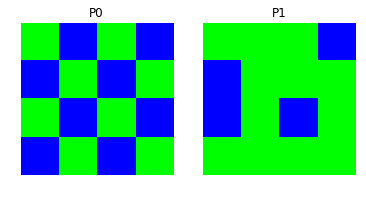

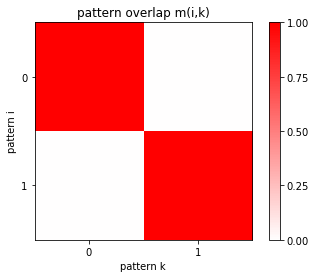

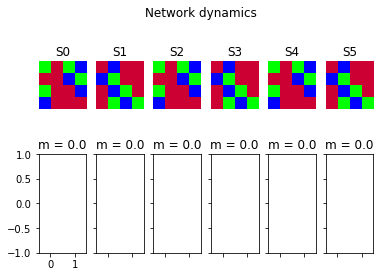

In [70]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=1, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

for nbr flips< 8, can still retrieve the pattern. but not always

### 8.3.2. Question: the weights matrix
The patterns a Hopfield network learns are not stored explicitly. Instead, the network learns by adjusting the weights to the pattern set it is presented during learning. Let’s visualize this.

Create a new 4x4 network. Do not yet store any pattern.

What is the size of the network matrix?

Visualize the weight matrix using the function plot_tools.plot_nework_weights(). It takes the network as a parameter.

Create a checkerboard, store it in the network.

Plot the weights matrix. What weight values do occur?

Create a new 4x4 network

Create an L-shaped pattern (look at the pattern factory doc), store it in the network

Plot the weights matrix. What weight values do occur?

Create a new 4x4 network

Create a checkerboard and an L-shaped pattern. Store both patterns in the network

Plot the weights matrix. What weight values do occur? How does this matrix compare to the two previous matrices?
### 8.3.3. Question (optional): Weights Distribution
It’s interesting to look at the weights distribution in the three previous cases. You can easily plot a histogram by adding the following two lines to your script. It assumes you have stored your network in the variable ‘hopfield_net’.

(array([  64.,    0.,    0.,    0.,    0.,  142.,    0.,    0.,    0.,   50.]),
 array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075,  0.1  ,  0.125]),
 <a list of 10 Patch objects>)

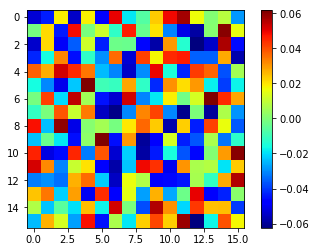

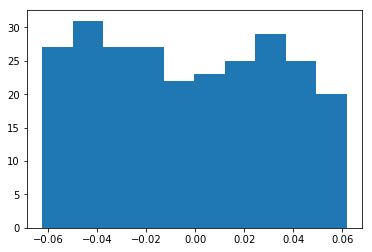

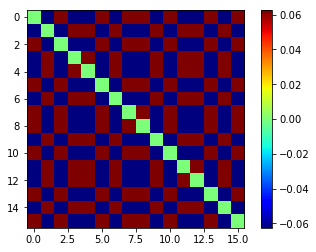

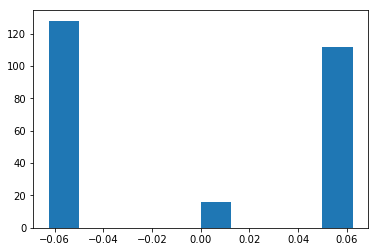

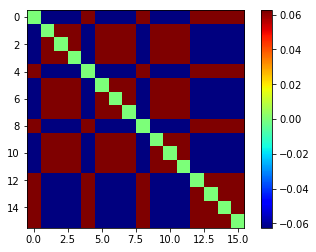

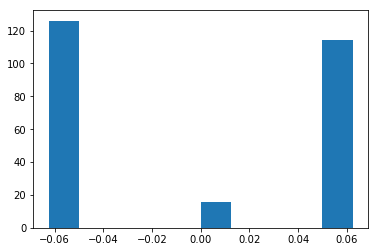

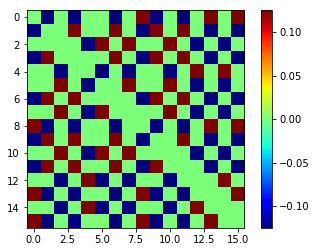

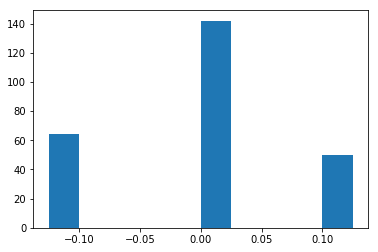

In [77]:


pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

plot_tools.plot_nework_weights(hopfield_net)
plt.figure()
plt.hist(hopfield_net.weights.flatten())





factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

##############################################
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

hopfield_net.store_patterns(pattern_list)

plot_tools.plot_nework_weights(hopfield_net)
plt.figure()
plt.hist(hopfield_net.weights.flatten())




##############################################
L_pat= factory.create_L_pattern()
pattern_list = [L_pat]

hopfield_net.store_patterns(pattern_list)

plot_tools.plot_nework_weights(hopfield_net)
plt.figure()
plt.hist(hopfield_net.weights.flatten())

##############################################
pattern_list = [checkerboard,L_pat]
hopfield_net.store_patterns(pattern_list)

plot_tools.plot_nework_weights(hopfield_net)
plt.figure()
plt.hist(hopfield_net.weights.flatten())


## 8.4. Exercise: Capacity of an N=100 Hopfield-network
Larger networks can store more patterns. There is a theoretical limit: the capacity of the Hopfield network. Read chapter “17.2.4 Memory capacity” to learn how memory retrieval, pattern completion and the network capacity are related.

### 8.4.1. Question:
A Hopfield network implements so called associative or content-adressable memory. Explain what this means.

### 8.4.2. Question:
Using the value Cstore given in the book, how many patterns can you store in a N=10x10 network? Use this number K in the next question:
 
$ P_{\rm error}=0.001$ , we find a storage capacity of  $C_{\rm store}=0.138.$
$K_{max}= N*C_{\rm store}=100*0.105=13$

### 8.4.3. Question:
Create an N=10x10 network and store a checkerboard pattern together with (K-1) random patterns. Then initialize the network with the unchanged checkerboard pattern. Let the network evolve for five iterations.

Rerun your script a few times. What do you observe?



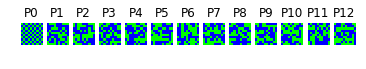

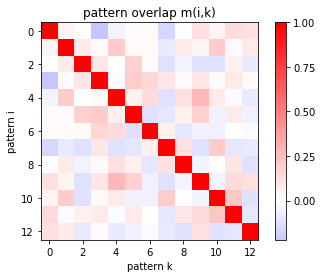

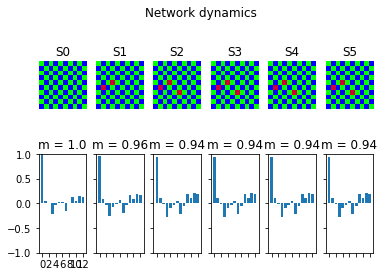

In [87]:
K=13

pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=K-1, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)


# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=0)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# it's not always fixed point

 ## 8.5. Exercise: Non-random patterns
In the previous exercises we used random patterns. Now we us a list of structured patterns: the letters A to Z. Each letter is represented in a 10 by 10 grid.



the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


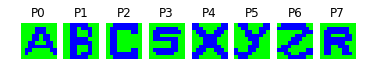

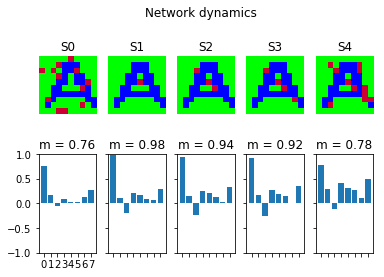

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z','R']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

### 8.5.3. Question:
Make a guess of how many letters the network can store.
13 like before ? 

Then create a (small) set of letters. 
Check if all letters of your list are fixed points under the network dynamics.

Explain the discrepancy between the network capacity C (computed above) and your observation.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


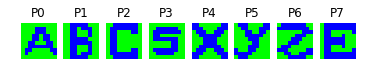

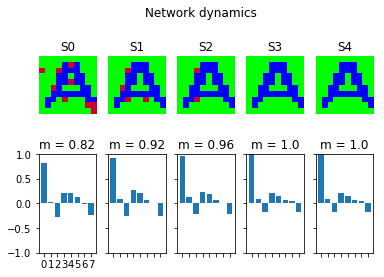

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z', 'E']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

In [92]:
#The letter are not random so there is coerrelation, like between and F and ands E

### 8.6. Exercise: Bonus
The implementation of the Hopfield Network in hopfield_network.network offers a possibility to provide a custom update function HopfieldNetwork.set_dynamics_to_user_function(). Have a look at the source code of HopfieldNetwork.set_dynamics_sign_sync() to learn how the update dynamics are implemented. Then try to implement your own function. For example, you could implement an asynchronous update with stochastic neurons.